# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 593


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + units
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mejit
Processing Record 2 of Set 1 | aldama
Processing Record 3 of Set 1 | badger
Processing Record 4 of Set 1 | kitimat
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | college
Processing Record 7 of Set 1 | portrush
Processing Record 8 of Set 1 | blackmans bay
Processing Record 9 of Set 1 | vilyuchinsk
Processing Record 10 of Set 1 | bredasdorp
Processing Record 11 of Set 1 | susuman
Processing Record 12 of Set 1 | page
Processing Record 13 of Set 1 | fuglafjordur
Processing Record 14 of Set 1 | thompson
Processing Record 15 of Set 1 | mandalgovi
Processing Record 16 of Set 1 | maracacume
Processing Record 17 of Set 1 | taiohae
City not found. Skipping...
Processing Record 18 of Set 1 | grytviken
Processing Record 19 of Set 1 | port-aux-francais
Processing Record 20 of Set 1 | papatowai
Processing Record 21 of Set 1 | uturoa
Processing Record 22 of Set 1 | bilibino
Processin

In [4]:
city_data

[{'City': 'mejit',
  'Lat': 10.2753,
  'Lng': 170.8646,
  'Max Temp': 27.58,
  'Humidity': 81,
  'Cloudiness': 100,
  'Wind Speed': 7.88,
  'Country': 'MH',
  'Date': 1715420985},
 {'City': 'aldama',
  'Lat': 22.9167,
  'Lng': -98.0667,
  'Max Temp': 25.76,
  'Humidity': 90,
  'Cloudiness': 41,
  'Wind Speed': 1.39,
  'Country': 'MX',
  'Date': 1715420985},
 {'City': 'badger',
  'Lat': 64.8,
  'Lng': -147.5333,
  'Max Temp': 6.15,
  'Humidity': 52,
  'Cloudiness': 0,
  'Wind Speed': 3.09,
  'Country': 'US',
  'Date': 1715420986},
 {'City': 'kitimat',
  'Lat': 54.0524,
  'Lng': -128.6534,
  'Max Temp': 11.21,
  'Humidity': 70,
  'Cloudiness': 97,
  'Wind Speed': 0.56,
  'Country': 'CA',
  'Date': 1715420987},
 {'City': 'albany',
  'Lat': 42.6001,
  'Lng': -73.9662,
  'Max Temp': 9.4,
  'Humidity': 94,
  'Cloudiness': 100,
  'Wind Speed': 1.13,
  'Country': 'US',
  'Date': 1715420988},
 {'City': 'college',
  'Lat': 64.8569,
  'Lng': -147.8028,
  'Max Temp': 6.2,
  'Humidity': 49,
  'Clou

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mejit,10.2753,170.8646,27.58,81,100,7.88,MH,1715420985
1,aldama,22.9167,-98.0667,25.76,90,41,1.39,MX,1715420985
2,badger,64.8000,-147.5333,6.15,52,0,3.09,US,1715420986
3,kitimat,54.0524,-128.6534,11.21,70,97,0.56,CA,1715420987
4,albany,42.6001,-73.9662,9.40,94,100,1.13,US,1715420988


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("Output/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("Output/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mejit,10.2753,170.8646,27.58,81,100,7.88,MH,1715420985
1,aldama,22.9167,-98.0667,25.76,90,41,1.39,MX,1715420985
2,badger,64.8000,-147.5333,6.15,52,0,3.09,US,1715420986
3,kitimat,54.0524,-128.6534,11.21,70,97,0.56,CA,1715420987
4,albany,42.6001,-73.9662,9.40,94,100,1.13,US,1715420988


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

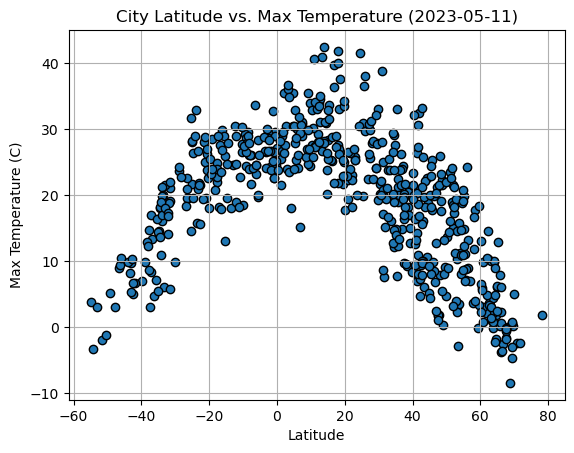

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df.iloc[:,1], city_data_df.iloc[:,3],edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Latitude vs. Max Temperature (2023-05-11)')
plt.grid()

# Save the figure
plt.savefig("Output/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

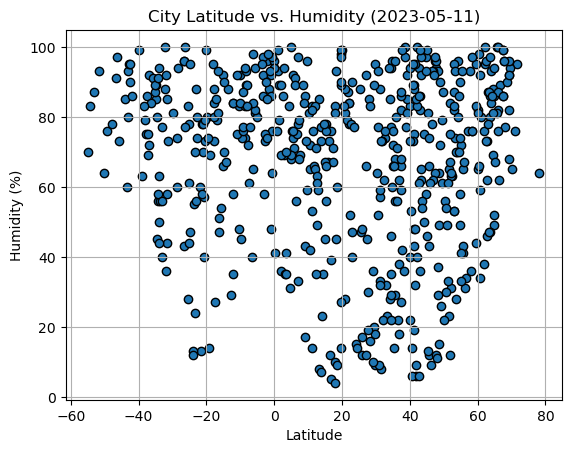

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df.iloc[:,1], city_data_df.iloc[:,4], edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (2023-05-11)')
plt.grid()

# Save the figure
plt.savefig("Output/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

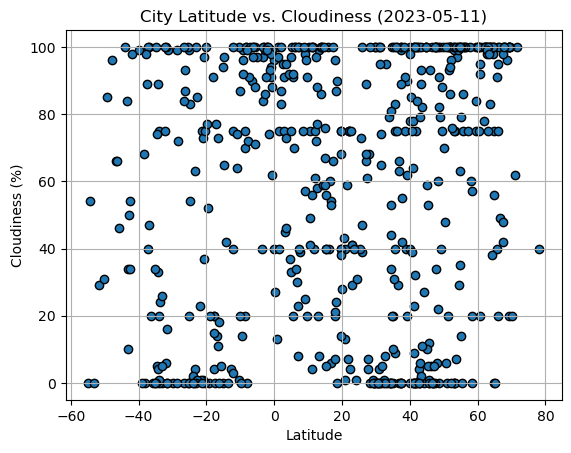

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df.iloc[:,1], city_data_df.iloc[:,5], edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (2023-05-11)')
plt.grid()

# Save the figure
plt.savefig("Output/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

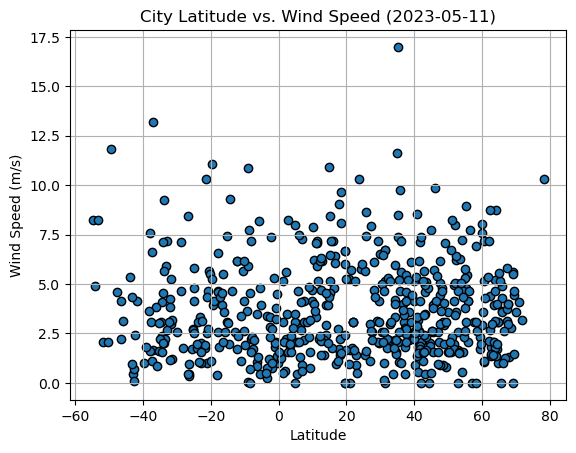

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df.iloc[:,1], city_data_df.iloc[:,6], edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs. Wind Speed (2023-05-11)')
plt.grid()

# Save the figure
plt.savefig("Output/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
x_values = 
y_values = 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

SyntaxError: invalid syntax (2325738169.py, line 2)

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mejit,10.2753,170.8646,27.58,81,100,7.88,MH,1715420985
1,aldama,22.9167,-98.0667,25.76,90,41,1.39,MX,1715420985
2,badger,64.8000,-147.5333,6.15,52,0,3.09,US,1715420986
3,kitimat,54.0524,-128.6534,11.21,70,97,0.56,CA,1715420987
4,albany,42.6001,-73.9662,9.40,94,100,1.13,US,1715420988


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
7,blackmans bay,-43.0167,147.3167,9.74,93,34,0.45,AU,1715420991
9,bredasdorp,-34.5322,20.0403,18.13,45,5,4.10,ZA,1715420992
15,maracacume,-2.0428,-45.9592,24.25,96,100,0.77,BR,1715420997
16,grytviken,-54.2811,-36.5092,-3.24,83,54,4.88,GS,1715420999
17,port-aux-francais,-49.3500,70.2167,5.14,76,85,11.84,TF,1715420999


###  Temperature vs. Latitude Linear Regression Plot

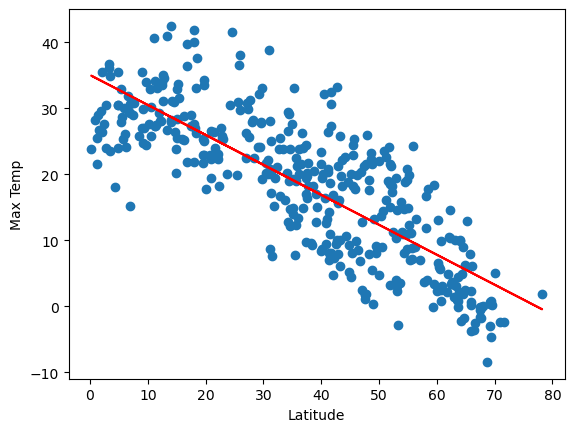

The r-value is: -0.8054387096875817


In [16]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,265),fontsize=10,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()
print(f"The r-value is: {rvalue}")

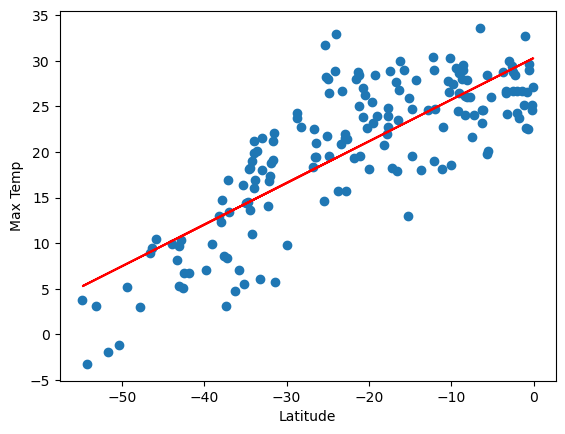

The r-value is: 0.8055050985066473


In [17]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20, 275),fontsize=10,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()
print(f"The r-value is: {rvalue}")

**Discussion about the linear relationship:** 

There is a strong negative linear relationship between Latitude and Maximum Temperature on Northern Hemisphere cities. It means the maximum temperature tends to decrease as the latitude increases in Northern Hemisphere cities.

There is a strong positive linear relationship between Latitude and Maximum Temperature on Southern Hemisphere cities. It means the maximum temperature tends to increase as the latitude increases in Southern Hemisphere cities.


### Humidity vs. Latitude Linear Regression Plot

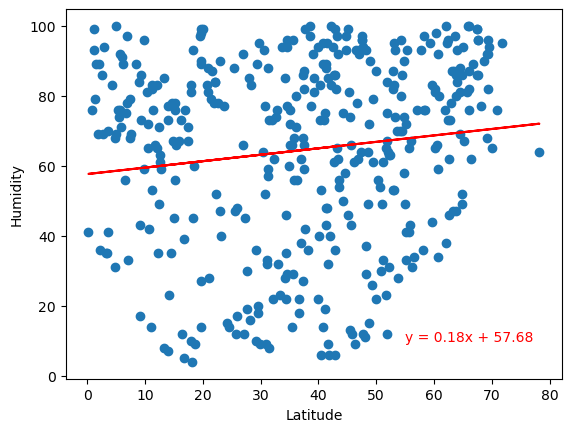

The r-value is: 0.13506458481521502


In [18]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(55,10),fontsize=10,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()
print(f"The r-value is: {rvalue}")

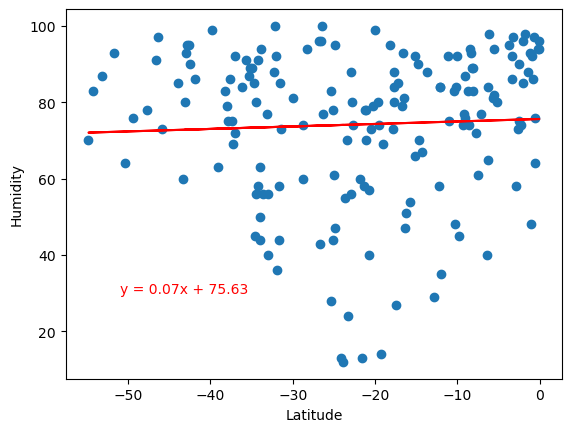

The r-value is: 0.046404575095574115


In [19]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-51, 30),fontsize=10,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()
print(f"The r-value is: {rvalue}")

**Discussion about the linear relationship:** 

The Pearson R correlation coefficient of Humidity and Latitude of cities in both Northern Hemisphere and Southern Hemisphere are 0.14 and 0.05. Therefore, the linear relationship between those two variables is considered very weak. The changes in Latitude are not strongly associated with the changes in Humidity in both Northern Hemisphere and Southern Hemisphere cities.

### Cloudiness vs. Latitude Linear Regression Plot

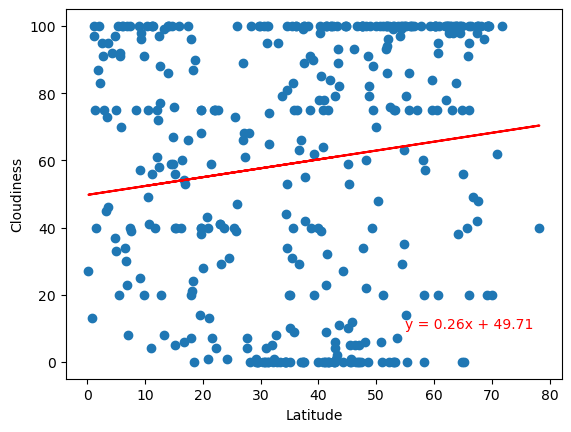

The r-value is: 0.13418905414188903


In [20]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(55,10),fontsize=10,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()
print(f"The r-value is: {rvalue}")

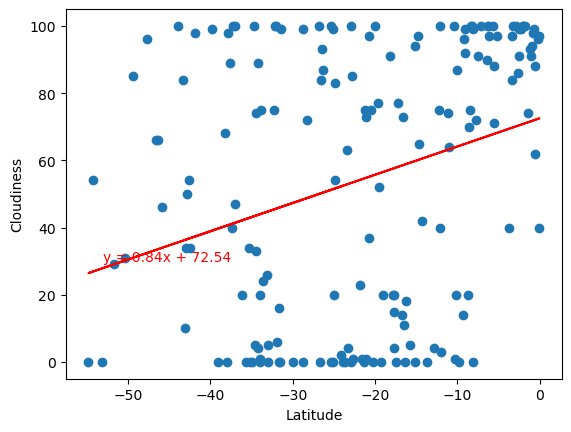

The r-value is: 0.298347605464831


In [21]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-53, 30),fontsize=10,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()
print(f"The r-value is: {rvalue}")

**Discussion about the linear relationship:**

The Pearson R correlation coefficient of Cloudiness and Latitude of cities in both Northern Hemisphere and Southern Hemisphere are 0.13 and 0.3. Therefore, the linear relationship between those two variables is considered very weak. The changes in Latitude are not strongly associated with the changes in Cloudiness in both Northern Hemisphere and Southern Hemisphere cities.

### Wind Speed vs. Latitude Linear Regression Plot

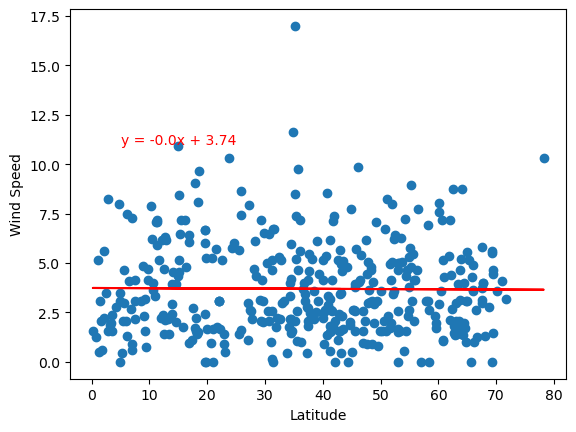

The r-value is: -0.009205601712892319


In [22]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,11),fontsize=10,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()
print(f"The r-value is: {rvalue}")

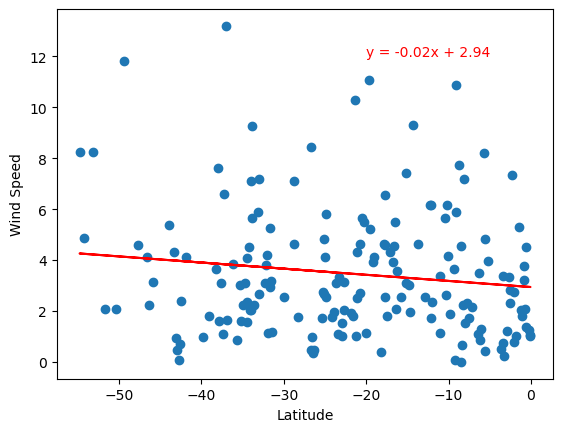

The r-value is: -0.1355081203848755


In [23]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,12),fontsize=10,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()
print(f"The r-value is: {rvalue}")

**Discussion about the linear relationship:** 

The Pearson R correlation coefficient of Wind Speed and Latitude of cities in both Northern Hemisphere and Southern Hemisphere are -0.01 and -0.14. Therefore, the linear relationship between those two variables is considered very weak. The changes in Latitude are not strongly associated with the changes in Wind Speed in both Northern Hemisphere and Southern Hemisphere cities.